# Play with sudoku
---

In [1]:
# %load nb_cell0.py
import os
import sys
from pathlib import Path

print('Python: {}; sys.prefix: {}\n'.format(sys.version, sys.prefix))
print('Currrent dir:', Path.cwd())


# TODO: convert os. code to work with Path
def add_to_sys_path(this_path, up=False):
    """
    Prepend this_path to sys.path.
    If up=True, path refers to parent folder (1 level up).
    """
    for p in sys.path:
        p = os.path.abspath(p)
    if up:
        newp = os.path.abspath(os.path.join(this_path, '..'))
    else:
        newp = os.path.abspath(this_path)
        
    if this_path not in (p, p + os.sep):
        print('Path added to sys.path: {}'.format(newp))
        sys.path.insert(0, newp)
        
# if notebook inside another folder, eg ./notebooks:
up =  os.path.abspath(os.path.curdir).endswith('notebooks')
add_to_sys_path(os.path.curdir, up)

if up:
    DIR_IMG = Path.cwd().parent.joinpath('Images')
else:
    DIR_IMG = Path.cwd().joinpath('Images')
if not DIR_IMG.exists():
    Path.mkdir(DIR_IMG)
    
    
import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", 200)

import matplotlib as mpl
import matplotlib.pyplot as plt

from pprint import pprint as pp

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import HTML, Markdown, IFrame, Image

#display(HTML("<style>.container { width:100% !important; }</style>"))

def new_section(title):
    style = "text-align:center;background:#c2d3ef;padding:20px;color:#ffffff;font-size:3em;width:98%"
    return HTML('<div style="{}">{}</div>'.format(style, title))

def filter_dir(obj, start_with_str='_', exclude=True):
    return [d for d in dir(obj) if not d.startswith(start_with_str) == exclude]

import inspect

def get_mdl_pkgs(alib):
    "Inspect module hierarchy on two levels ony."
    pkgs = {}
    for name, mdl in inspect.getmembers(alib, inspect.ismodule):
        print('\n{:>13} : {}'.format(mdl.__name__, filter_dir(mdl)))
        for mdl_name, mdl_sub in inspect.getmembers(mdl, inspect.ismodule):
            if mdl_sub.__doc__:
                print('\n{:>20} : {}'.format(mdl_name, mdl_sub.__doc__.strip()))

%load_ext autoreload
%autoreload 2 

Python: 3.6.7 (default, Feb 28 2019, 07:28:18) [MSC v.1900 64 bit (AMD64)]; sys.prefix: C:\Users\catch\Anaconda3\envs\dsml

Currrent dir: C:\Users\catch\Documents\GH_Projects\Udacity_AI\notebooks
Path added to sys.path: C:\Users\catch\Documents\GH_Projects\Udacity_AI


In [440]:
import random

# Number of initial digits to show per level:
#  1:easy, 2:medium, 3:difficult:
LEVELS = {1:4, 2:3, 3:2}


def check_game(grid):
    """ Return True if grid is a valid Sudoku square, otherwise False. """
    out = []
    print('Checking game: uniq vals, idx, count')
    for i in range(9):
        au, ai, ac = np.unique(grid[i,:], return_index=True, return_counts=True)
        print(f'Row_{i}:', au, ai, ac)
        au, ai, ac = np.unique(grid[:, i], return_index=True, return_counts=True)
        print(f'Col_{i}:', au, ai, ac)
        # j, k index top left hand corner of each 3x3 tile
        j, k = (i // 3) * 3, (i % 3) * 3
        au, ai, ac = np.unique(grid[i,:], return_index=True, return_counts=True)
        print(f'Box_{j}:', au, ai, ac)
        
    return


def check_box_sudoku(cell):
    """ Return True if 3x3 box containing cell(j, k) is valid. """
    # j, k index top left hand corner of each 3x3 tile
    j, k = (cell[0] // 3) * 3, (cell[1] % 3) * 3
    if len(set(grid[j:j+3, k:k+3].ravel())) != 9:
        return False
    return True


def init_sudoku0(level=1):
    game0 = np.zeros((9,9), dtype='int8')

    gl = LEVELS[level]
    digits = np.arange(1, 10)
    
    for i in range(9):    
        # create a non-repeating selection of digits of size gl:
        idx_set = random.sample(range(1, 10), gl)
        #print(i, idx_set)
        
        c, k = (i // 3) * 3, (i % 3) * 3
        #sq_3 = game0[c:c+3, c:c+3].ravel()
        #print('sq_3',sq_3)
            
        for j in idx_set:
            x = digits[np.random.choice(digits,1)-1][0]
            #print('x',x)
            game0[i, j-1] = x
            
            # define 3x3 square:
            sq_3 = game0[c:c+3, c:c+3]#.ravel()
            #print('sq_3',sq_3)
            
            s1 = set(game0[i, :])
            s2 = set(game0[:, j-1])
            s3 = set(sq_3[sq_3>0].ravel())
            
            sd = s1.symmetric_difference(s2).symmetric_difference(s3)
            #print('sd',sd)
            
            if not len(sd):
                if not len(s3):
                    game0[i, j-1] = x
                elif not x in s3:
                    game0[i, j-1] = x
            else:
                if x not in sd:
                    game0[i, j-1] = x
                
    return game0


def init_sudoku1(level=1):
    game0 = np.zeros((9,9), dtype='int8')

    gl = LEVELS[level]
    digits = np.arange(1, 10)
    
    for i in range(9):    
        # create a non-repeating selection of digits of size gl:
        idx_set = random.sample(list(digits), gl)

        c, k = (i // 3) * 3, (i % 3) * 3
        sq_3 = game0[c:c+3, c:c+3].ravel()
        
        s1 = set(game0[i, :])
        
        for j in idx_set:
            x = digits[np.random.choice(digits, 1) - 1][0]
            #while x == j:
            #    x = digits[np.random.choice(digits, 1) - 1][0]
            #print('x:', x)
            #game0[i, j-1] = x
            
            #s1 = set(game0[i, :])
            s2 = set(game0[:, j-1])
            s3 = set(sq_3[sq_3>0])
            
            sd = s1.symmetric_difference(s2)
            
            if not len(sd):
                if not len(s3):
                    game0[i, j-1] = x
                elif not x in s3:
                    game0[i, j-1] = x
            else:
                if x not in sd:
                    game0[i, j-1] = x
                    
    nz_indices = np.argwhere(game0)            
    return game0, nz_indices


def init_sudoku(level=1):

    gl = LEVELS[level]
    
    board = []
    digits = np.arange(1,10, dtype='int8')
    board.append(digits)

    # step 1: create a systemtically filled board
    # according to a cyclic shifting scheme:
    shift = 3
    s0 = 0
    for i in range(1, 9):
        # shift initial row by 3  for 3 rows;
        # reset initial row to 1st row shifted by s0;
        # repeat until 3 3x3 squares are formed.
        if (i % 3 == 0):
            s0 += 1
            a = np.roll(board[0], -s0)
        else:
            a = np.roll(board[i-1], -shift)
        board.append(a)

    board = np.array(board)
    #print('board before shuffling:\n', board)
    
    # step 2: shuffle the rows and column within each 3x3 square
    for i in range(3):
        r1, c1 = (i % 3) * 3, (i // 3) * 3
        board[r1:r1+3, c1:c1+3] = np.random.permutation(board[r1:r1+3, c1:c1+3])
    for i in range(3, 6):
        r1, c1 = (i % 3) * 3, (i // 3) * 3
        board[r1:r1+3, c1:c1+3] = np.random.permutation(board[r1:r1+3, c1:c1+3])
    for i in range(6, 9):
        r1, c1 = (i % 3) * 3, (i // 3) * 3
        board[r1:r1+3, c1:c1+3] = np.random.permutation(board[r1:r1+3, c1:c1+3])

    # step3: fill random cells with zeros according to level
    tot = 81
    keep = gl*9
    hide = tot - keep
    # set hide cell values to 0:
    np.put(board, np.random.choice(range(tot), hide, replace=False), 0)
    
    return board.tolist()

    
def plot_sudoku(game, nz_cells, figsize=(6, 6), save_fig=None):
    """
    Return a sudoku board with values in input array.
    :param: game: a 9x9 array
    """
    if isinstance(game, list):
        game = np.array(game)
        
    # check 9x9:
    if game.size != 81:
        return 'Wrong sudoku dims! (9x9 expected)'
    
    plt.figure(figsize=figsize)
    ax = plt.gca()
    
    lims = [0, 9]
    
    for x in range(9):
        for y in range(9):
            w = game[8-y][x]
            if w > 0:
                color = 'lightgrey'
                plt.text(x+0.3, y+0.3, str(w), fontsize=20)
            else:
                color = 'white'
            # bg color for initial cells only:
            if [8-y, x] in nz_cells:
                rect = plt.Rectangle([x, y], 1, 1, facecolor=color, edgecolor='grey')
                ax.add_patch(rect)
            
            if y%3 == 0:
                plt.plot(lims, [y,y], color='black', linewidth=2)
                plt.plot([y,y], lims, color='black', linewidth=2)

    # complete last edges:            
    plt.plot(lims, [9,9], color='black', linewidth=2)
    plt.plot([9,9], lims, color='black', linewidth=2)    

    plt.axis('off')
    
    if save_fig:
        plt.savefig(f'{save_fig}')
    plt.show()
    
    
def board_mask(game, k=None):
    # mask fun to work with np.mask_indices
    return game>0

In [441]:
game1, nzidx = init_sudoku1()
game1

check_game(game1)

array([[0, 0, 5, 2, 0, 3, 5, 0, 0],
       [0, 2, 0, 0, 8, 0, 0, 7, 0],
       [9, 0, 0, 1, 4, 0, 0, 0, 0],
       [0, 7, 0, 0, 0, 0, 0, 0, 3],
       [4, 0, 0, 5, 3, 0, 0, 4, 0],
       [0, 0, 0, 7, 0, 0, 7, 0, 4],
       [0, 0, 0, 0, 0, 0, 0, 3, 5],
       [0, 3, 0, 0, 0, 6, 0, 0, 0],
       [0, 9, 0, 0, 0, 7, 0, 1, 0]], dtype=int8)

Checking game: uniq vals, idx, count
Row_0: [0 2 3 5] [0 3 5 2] [5 1 1 2]
Col_0: [0 4 9] [0 4 2] [7 1 1]
Box_0: [0 2 3 5] [0 3 5 2] [5 1 1 2]
Row_1: [0 2 7 8] [0 1 7 4] [6 1 1 1]
Col_1: [0 2 3 7 9] [0 1 7 3 8] [5 1 1 1 1]
Box_0: [0 2 7 8] [0 1 7 4] [6 1 1 1]
Row_2: [0 1 4 9] [1 3 4 0] [6 1 1 1]
Col_2: [0 5] [1 0] [8 1]
Box_0: [0 1 4 9] [1 3 4 0] [6 1 1 1]
Row_3: [0 3 7] [0 8 1] [7 1 1]
Col_3: [0 1 2 5 7] [1 2 0 4 5] [5 1 1 1 1]
Box_3: [0 3 7] [0 8 1] [7 1 1]
Row_4: [0 3 4 5] [1 4 0 3] [5 1 2 1]
Col_4: [0 3 4 8] [0 4 2 1] [6 1 1 1]
Box_3: [0 3 4 5] [1 4 0 3] [5 1 2 1]
Row_5: [0 4 7] [0 8 3] [6 1 2]
Col_5: [0 3 6 7] [1 0 7 8] [6 1 1 1]
Box_3: [0 4 7] [0 8 3] [6 1 2]
Row_6: [0 3 5] [0 7 8] [7 1 1]
Col_6: [0 5 7] [1 0 5] [7 1 1]
Box_6: [0 3 5] [0 7 8] [7 1 1]
Row_7: [0 3 6] [0 1 5] [7 1 1]
Col_7: [0 1 3 4 7] [0 8 6 4 1] [5 1 1 1 1]
Box_6: [0 3 6] [0 1 5] [7 1 1]
Row_8: [0 1 7 9] [0 7 5 1] [6 1 1 1]
Col_8: [0 3 4 5] [0 3 5 6] [6 1 1 1]
Box_6: [0 1 7 9] [0 7 5 1] [6 1 1 1]


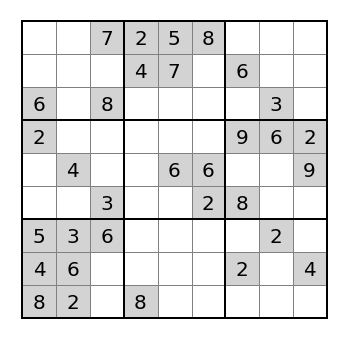

In [437]:
plot_sudoku(game1, nzidx)

---
Code for reference:

In [65]:
# my first attempt 
import random
    
# number of initial digits to show per level:
#  1:easy, 2:medium, 3:difficult:
LEVELS = {1:4, 2:3, 3:2}


def select_uniq_digits(game_level=1):
    choices = list(np.arange(1,10))
    s_choices = set(choices)
    
    gl = LEVELS[game_level]
    #a = np.random.randint(0,9, gl)
    a = random.sample(choices, gl)
    #print('choices:', choices, '\na      :',a)

    au, ai, ac = np.unique(a, return_index=True, return_counts=True)
    ix = np.where(ac>1)

    if len(ix):
        for i, x in enumerate(ix):
            if len(x):
                xx = ai[x][0]
                sd = s_choices.symmetric_difference(set(a))
                new = np.choose([0], list(sd))
                a[xx] = new

    return np.choose(a, choices).flatten()

In [194]:
def check_rc(ar, i, axis):
    # determines number of unique elements in each row (axis=0) or column (axis!=1)
    # alt way:
    if axis == 0:
        print(ar[i,:])
        au, ai, ac = np.unique(ar[i,:], return_index=True, return_counts=True)
    else:
        print(ar[:,i])
        au, ai, ac = np.unique(ar[:,i], return_index=True, return_counts=True)   
    print(au)
    print(ai)
    print(ac)
    nu_uniq = ac.sum()
    return nu_uniq

def check_box(i, board):
    # is_unique & >0
    
    c, k = (i // 3) * 3, (i % 3) * 3
    b = board[c:c+3, c:c+3]
    au, ai, ac = np.unique(b, return_index=True, return_counts=True)
    if au[0] == 0:
        # resize:
        au = au[1:]
        ai = ai[1:]
        ac = ac[1:]
    
    assert(len(au) == ac.sum())
    
    return b, au, ai, ac

In [171]:
print('board:')
game

array([[7, 8, 9, 0, 0, 0, 7, 8, 0],
       [4, 5, 0, 4, 0, 0, 4, 0, 0],
       [0, 0, 0, 7, 0, 0, 0, 2, 3],
       [8, 0, 0, 0, 6, 0, 5, 6, 0],
       [0, 6, 7, 2, 0, 4, 0, 0, 0],
       [0, 0, 4, 8, 0, 1, 0, 9, 1],
       [9, 1, 0, 3, 4, 0, 3, 0, 5],
       [0, 4, 0, 0, 7, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 6, 7, 0]])

In [195]:
b, au, ai, ac = check_box(5, game)
b, au, ai, ac

(array([[0, 6, 0],
        [2, 0, 4],
        [8, 0, 1]]),
 array([1, 2, 4, 6, 8]),
 array([8, 3, 5, 1, 6], dtype=int64),
 array([1, 1, 1, 1, 1], dtype=int64))

# Sudoku with SA (simulated annealing)
### http://iacs-courses.seas.harvard.edu/courses/am207/blog/lab-7.html

Let's consider what a correct solution would look like.  
It would have only unique integers in each row, column and 3x3 box.  
So, if in a particular row, we had the same number twice, then this must be wrong, and this row would not have $E=0$, but $E=1$, i.e., there is 1 incorrect number.  
So, the energy of our system is simply the sum of all non-unique numbers in each column, row and 3x3 box.  

Conversely, we can think of this as the number of unique elements in each row, column, and box, and then we get back to $E=0$ by susbtracting what the enrgy of a correct solution would be:  
$9 \times 9 \times 3 = 243$,

$ E_{\rm tot} = 243 - \sum_{i,j,k} E_{\rm row,i} + E_{\rm col,j} + E_{box,k}$

In [147]:
def check(i, axis, n):
    # determines number of unique elements in each row (axis=0) or column (axis!=1)
    nums = np.arange(9) + 1
    nu = 0
    for j in range(9):
        if axis == 0:
            i1 = n[i][j]-1
        else:
            i1 = n[j][i]-1

        if i1 == -1: # Quick check that there are no zeros
            return -1
        
        if nums[i1]!=0:
            nu+=1
            nums[i1]=0
  
    return nu


def checksq(isq, jsq, n):
    # determines number of unique elements in square isq, jsq
    nums=np.arange(9)+1
    nu = 0
    i0 = isq*3
    j0 = jsq*3
    for i in range(3):
        for j in range(3):
            i1 = n[i0+i][j0+j] - 1

            if i1==-1: # Quick check that there are no zeros
                return -1
        
            if nums[i1]!=0:
                nu+=1
                nums[i1]=0
                
    return nu

def calc_energy(n):
    # computes the "energy" of the input grid configuration
    sum = 0
    for i in range(9):
        sum += check(i,1,n) + check(i,2,n)
    
    for i in range(3):
        for j in range(3):
            sum += checksq(i,j,n)
    # 243 = 9*9*3? why not 9*9*9?
    
    return 243 - sum

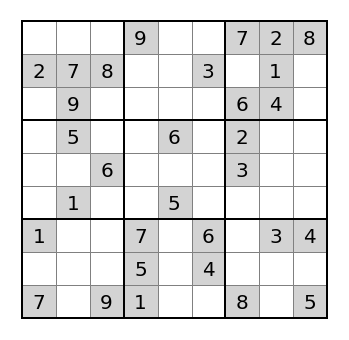

In [453]:
sudoku_hard = np.array([[0,0,0,9,0,0,7,2,8],
                      [2,7,8,0,0,3,0,1,0],
                      [0,9,0,0,0,0,6,4,0],
                      [0,5,0,0,6,0,2,0,0],
                      [0,0,6,0,0,0,3,0,0],
                      [0,1,0,0,5,0,0,0,0],
                      [1,0,0,7,0,6,0,3,4],
                      [0,0,0,5,0,4,0,0,0],
                      [7,0,9,1,0,0,8,0,5]])

nz_indices = np.argwhere(sudoku_hard)
plot_sudoku(sudoku_hard, nz_indices)

In [454]:
nz_indices

array([[0, 3],
       [0, 6],
       [0, 7],
       [0, 8],
       [1, 0],
       [1, 1],
       [1, 2],
       [1, 5],
       [1, 7],
       [2, 1],
       [2, 6],
       [2, 7],
       [3, 1],
       [3, 4],
       [3, 6],
       [4, 2],
       [4, 6],
       [5, 1],
       [5, 4],
       [6, 0],
       [6, 3],
       [6, 5],
       [6, 7],
       [6, 8],
       [7, 3],
       [7, 5],
       [8, 0],
       [8, 2],
       [8, 3],
       [8, 6],
       [8, 8]], dtype=int64)

In [455]:
# What is the energy of our starting position?
e_prev = calc_energy(sudoku_hard)
print('The system Energy of the initial configuration is:', e_prev)

The system Energy of the initial configuration is: 270


It's important to remember which are the fixed numbers specific to this puzzle, these cannot be moved between interations. We can just use a mask for this.

In [457]:
board = sudoku_hard
mask = board>0

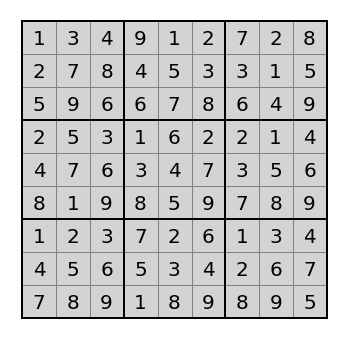

In [458]:
# Assign the remaining integers to open cells so that each block contains all integers once only.
for ib in range(3):
    for jb in range(3):

        nums = np.arange(9) + 1  #{1,2...8,9}
        for i in range(3):
            for j in range(3):
                i1 = ib*3 + i
                j1 = jb*3 + j

                if board[i1][j1]!=0:
                    ix = board[i1][j1]
                    # replace the already used number with 0
                    nums[ix-1]=0

        # Now we have an array that contains the unused numbers.
        # So we populate using that array.
        iy = -1
        num1 = np.zeros(sum(nums>0))
        for k in range(9):
            if nums[k] != 0:
                iy += 1
                num1[iy] = nums[k]

        kk = 0
        for i in range(3):
            for j in range(3):
                i1 = ib*3 + i
                j1 = jb*3 + j
                if (board[i1][j1]==0):
                    board[i1][j1] = num1[kk]
                    kk+=1

plot_sudoku(board, nz_indices)

> How should we decide how to construct a proposal? If we are going to smart about this and use SA, then the proposal shouldn't just come out of thin air, it should be based loosely on the accepted grid from the previous iteration. So, we trade numbers. We take a 'movable' number at one grid space and swap it with the number at another grid space. But remember, we distributed the numbers so that in each 3x3 box we had the numbers 1-9. To maintain this, we should make sure that we only swap numbers within the same 3x3 box. We then compute the energy of our proposal grid. If the energy goes down, then we accept. Otherwise toss a coin according to,

${\rm randU}(1) < {\rm exp}\left[-\Delta E / T\right] $

In [459]:
temp = 2.0 # starting temperature
ntrials = 100000 # number of trials we are going to run
therm = 0.9 # thermostat for the temperature when it's too hot
reanneal = 1000 # how often do we apply the thermostat?

def anneal(mat, temp, ntrials, therm, reanneal):
    for ll in range(ntrial):

        # at each step pick at random a block and two moveable elements in the block
        ib,jb = 3*np.random.randint(3,size=2)

        i1,j1 = np.random.randint(3,size=2)
        while mat[ib+i1][jb+j1]:
            i1,j1 = np.random.randint(3,size=2)

        i2,j2 = np.random.randint(3,size=2)
        while mat[ib+i2][jb+j2] or (i1==i2 and j1==j2):
            i2,j2 = np.random.randint(3,size=2)

        # swap the movable elements and compute the energy of the trial configuration
        propose_n=n.copy()
        propose_n[ib+i1][jb+j1] = n[ib+i2][jb+j2]
        propose_n[ib+i2][jb+j2] = n[ib+i1][jb+j1]

        # calculate the proposal system energy
        e_new = calc_energy(propose_n)
        deltaE = e_prev - e_new

        # Check the SA criterion
        if e_new < e_prev:
            e_prev = e_new
            n = propose_n
        else:
            if np.random.rand() < np.exp( float(deltaE)/temp):
                e_prev = e_new
                n = propose_n

        # stop computing if the solution is found
        if e_prev==0:
            break

        if(ll % reanneal) == 0:
            temp = temp * therm
            if temp < 0.1:
                temp = 0.5

        # is the code still running properly...?
        if (ll % 5000) == 0:
            print(ll, np.exp(float(deltaE)/temp), e_prev, e_new)

    if e_prev == 0:
        print(f'Solution found after {ll} steps')
        #plot_sudoku(n)
        return n
    else:
        print('Solution not found with given parameters')
        return None

---
# plt.matshow

In [22]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [19]:
n = 81//3
viridis = cm.get_cmap('viridis', n)

# The object viridis is a callable, that when passed a float between 0 and 1 returns an RGBA value from the colormap:
print(viridis(0.))
print(viridis(0.5))
print(viridis(1.))

# The list of colors that comprise the colormap can be directly accessed using the colors property, or it can be accessed indirectly by calling viridis with an array of values matching the length of the colormap. Note that the returned list is in the form of an RGBA Nx4 array, where N is the length of the colormap.
#print('viridis.colors\n', viridis.colors)
#print(f'viridis(range({n})):\n{viridis(range(n))}')
#print('viridis(np.linspace(0, 1, 9))\n', viridis(np.linspace(0, 1, n)))

(0.267004, 0.004874, 0.329415, 1.0)
(0.127568, 0.566949, 0.550556, 1.0)
(0.993248, 0.906157, 0.143936, 1.0)


In [20]:
def plot_examples(cms):
    """
    helper function to plot two colormaps
    """
    np.random.seed(19680801)
    data = np.random.randn(30, 30)

    fig, axs = plt.subplots(1, 2, figsize=(6, 3), constrained_layout=True)
    for [ax, cmap] in zip(axs, cms):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
        fig.colorbar(psm, ax=ax)
    plt.show()

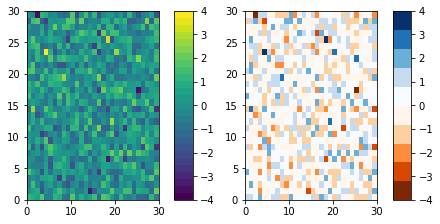

In [24]:
top = cm.get_cmap('Oranges_r', 5)
bottom = cm.get_cmap('Blues', 5)

newcolors = np.vstack((top(np.linspace(0, 1, 5)),
                       bottom(np.linspace(0, 1, 5))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')
plot_examples([viridis, newcmp])

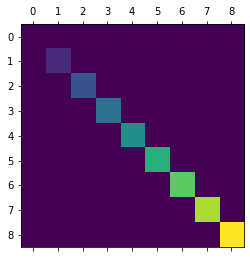

In [3]:
def samplemat(dims):
    """Make a matrix with all zeros and increasing elements on the diagonal"""
    aa = np.zeros(dims)
    for i in range(min(dims)):
        aa[i, i] = i
    return aa


# Display matrix
plt.matshow(samplemat((9,9)))
plt.show();

***